In [ ]:
""" Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have? """

In [47]:
import pandas as pd
df = pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
rows,columns = df.shape
print("Rows are : ",rows)
print("Columns are: ",columns)

Rows are :  10683
Columns are:  11


In [ ]:
""" Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution. """

<AxesSubplot: title={'center': 'Distribution of Prices'}, xlabel='Price', ylabel='Airline'>

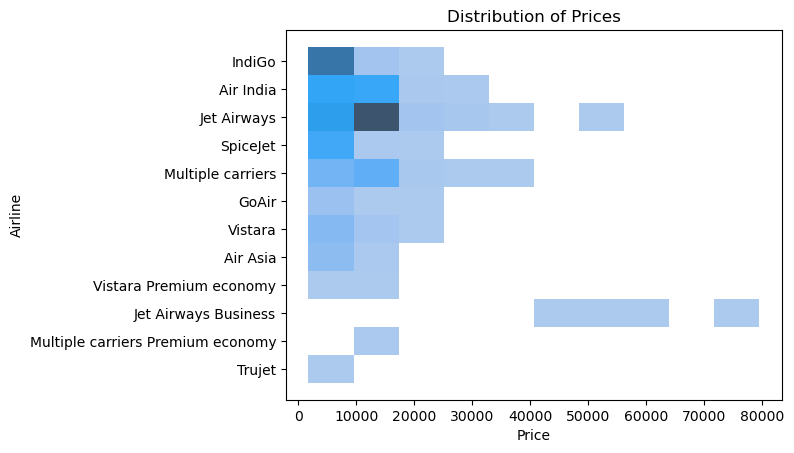

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Distribution of Prices")
sns.histplot(df, x = df["Price"],y = df["Airline"],bins = 10)

In [ ]:
""" Q3. What is the range of prices in the dataset? What is the minimum and maximum price? """

In [3]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
max1 = df["Price"].max()
min1 = df["Price"].min()
print("Maximum price is : ",max1)
print("Minimum price is: ",min1)

Maximum price is :  79512
Minimum price is:  1759


In [ ]:
""" Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines. """

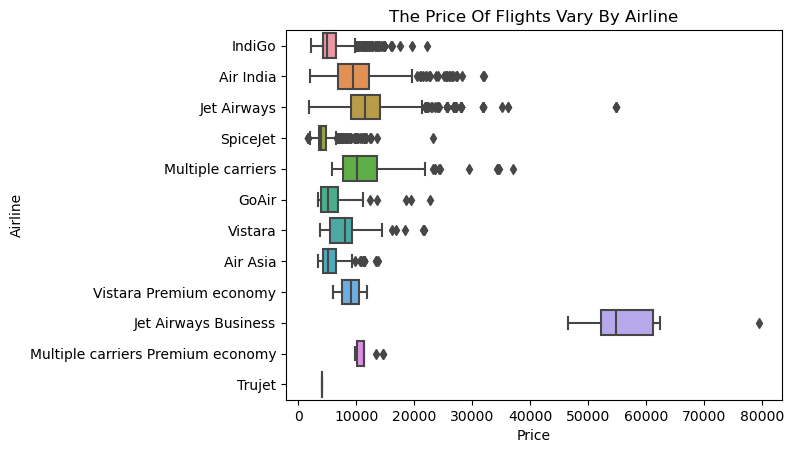

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("The Price Of Flights Vary By Airline")
plt.xlabel("Price")
plt.ylabel("Airline")
sns.boxplot(data = df ,x = df["Price"],y = df["Airline"])
plt.show()

In [ ]:
""" Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis. """

yes, there any outliers in the dataset

A boxplot is a graphical representation of the distribution of a dataset based on five summary statistics: minimum value, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum value. It also displays any potential outliers in the dataset, which are defined as observations that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
import numpy as np
minimum,q1,q2,q3,maximum = np.quantile(df["Price"],[0,0.25,0.5,0.75,1.0])
IQR = q3 - q1
lower = q1 - 1.5*(IQR)
higher = q3 + 1.5*(IQR)
print(lower)
print(higher)

-5367.0
23017.0


In [8]:
outliers = []
for i in df["Price"]:
    if(i > -5367.0 and i < 23017.0):
        not_outlier = i
    else:
        outliers.append(i)
print(outliers)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


<AxesSubplot: >

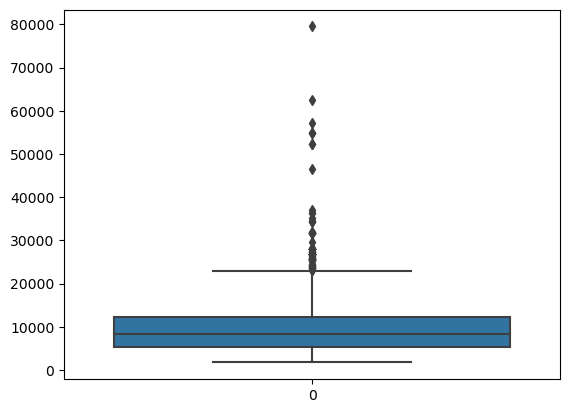

In [9]:
sns.boxplot(df["Price"])

In [ ]:
""" Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss? """

In [16]:
df["Date"] = df["Date_of_Journey"].str.split('/').str[0]
df["Month"] = df["Date_of_Journey"].str.split('/').str[1]
df["Year"] = df["Date_of_Journey"].str.split('/').str[2]
df["Date"] = df["Date"].astype(int)
df["Month"] = df["Month"].astype(int)
df["Year"] = df["Year"].astype(int)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


<AxesSubplot: xlabel='Airline', ylabel='Count'>

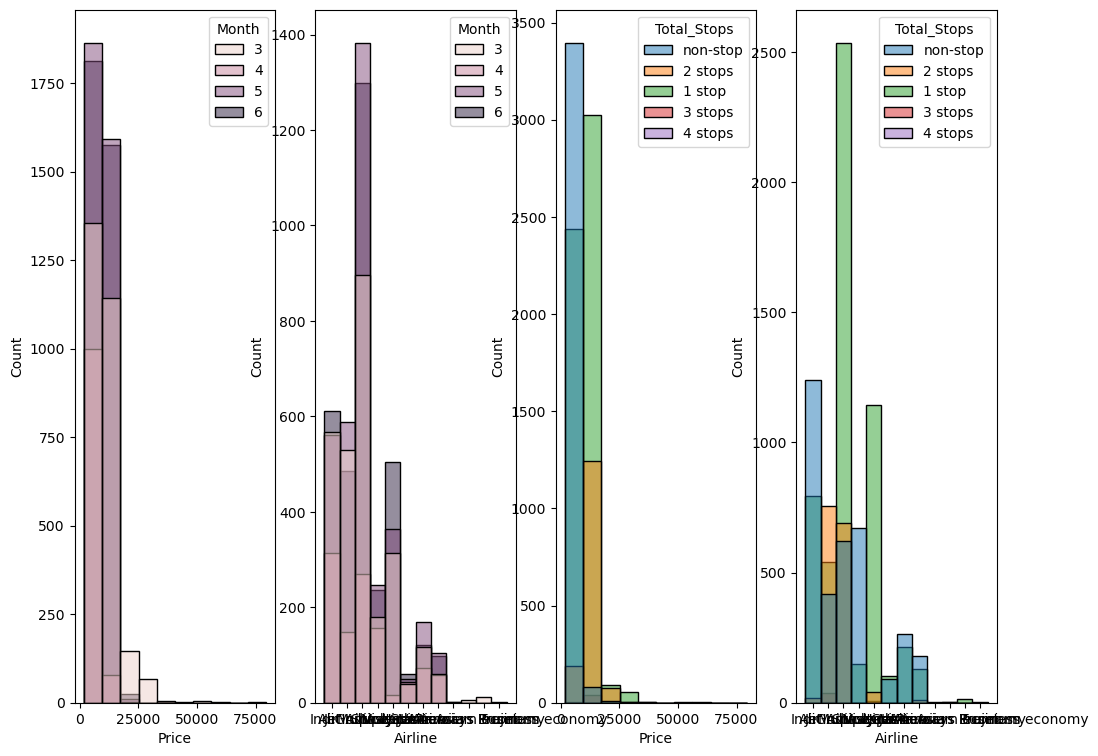

In [26]:
import warnings
warnings.filterwarnings('ignore')
fig,axis = plt.subplots(1,4,figsize = (15,9))
plt.subplot(151)
sns.histplot(data = df,x = df["Price"],bins = 10,hue = "Month")
plt.subplot(152)
sns.histplot(data = df,x = df["Airline"],bins = 10,hue = "Month")
plt.subplot(153)
sns.histplot(data = df,x = df["Price"],bins = 10,hue = "Total_Stops")
plt.subplot(154)
sns.histplot(data = df,x = df["Airline"],bins = 10,hue = "Total_Stops")

Observations:

    1. In may month there is Expensive travelling.
    2. There is less travel of flights in month April.
    3. Most Expensive Travelling flights are Non-stop flights
    4. Most Travelling Flights are 1-stop

In [ ]:
""" Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team? """

In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [39]:
df1 = df.groupby(by = "Airline")["Price"].mean().sort_values()
df1

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

<AxesSubplot: ylabel='Price'>

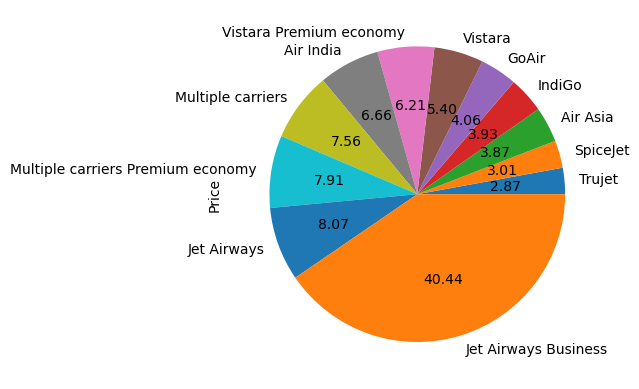

In [22]:
df1.plot(kind = 'pie',autopct = '%1.2f')

#Obseravtions:

1. Here,Cheapest Airline is Trujet.
2. Most Expensive Airline is Jet Airways Business

In [40]:
df["Month"] = df["Date_of_Journey"].str.split('/').str[1]
df["Month"] = df["Month"].astype(int)
df2 = df.groupby("Airline")["Month"].mean().sort_values()
df2

Airline
Jet Airways Business                 3.000000
Multiple carriers Premium economy    3.000000
Trujet                               3.000000
Vistara Premium economy              3.333333
Air India                            4.587900
IndiGo                               4.592791
Vistara                              4.615866
SpiceJet                             4.660147
GoAir                                4.670103
Air Asia                             4.746082
Jet Airways                          4.801247
Multiple carriers                    4.884615
Name: Month, dtype: float64

<AxesSubplot: xlabel='Airline'>

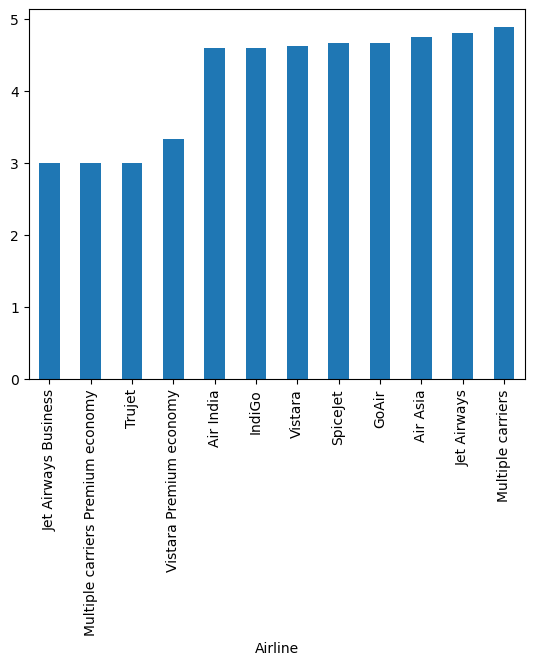

In [36]:
df1.plot(kind = 'bar')

Observations:

    1.On an average Monthly we observe Multiple carriers are travelling more.
    2.On an average Monthly we observe jet Airways Bussiness are travelling less.

In [ ]:
""" Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team? """

Factors that Mostly affect Flight Prices are:

    1. Duration
    2. Total Stops

<AxesSubplot: title={'center': 'Comparsion of Duration VS Price'}, xlabel='Duration', ylabel='Price'>

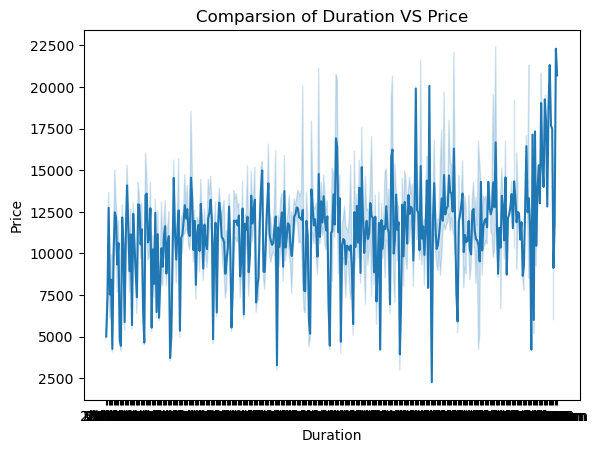

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Comparsion of Duration VS Price")
sns.lineplot(data = df, x = df["Duration"] , y = df["Price"])

Observations:
    
    When Duration increases then Price is also Increases.

Text(0.5, 1.0, 'Comparision of Total_stops and Price')

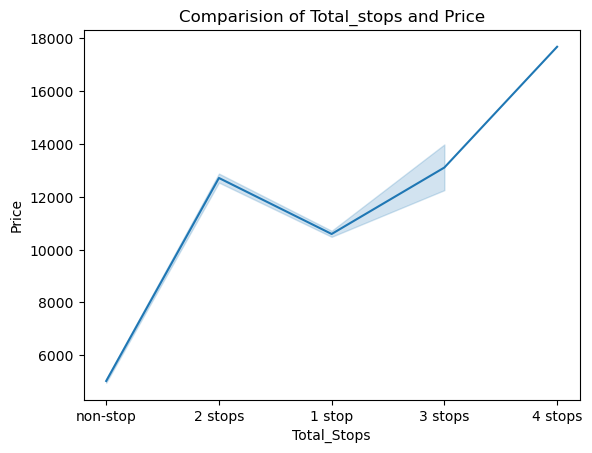

In [54]:
sns.lineplot(df, x = df["Total_Stops"], y = df["Price"])
plt.title("Comparision of Total_stops and Price")

Observations:
    
    Here, When there is stops are more than the Price is also More...

In [ ]:
""" Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have? """

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
rows,columns = df.shape
print("No.of rows: ",rows)
print("No.of Columns: ",columns)

No.of rows:  10841
No.of Columns:  13


In [ ]:
""" Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories. """

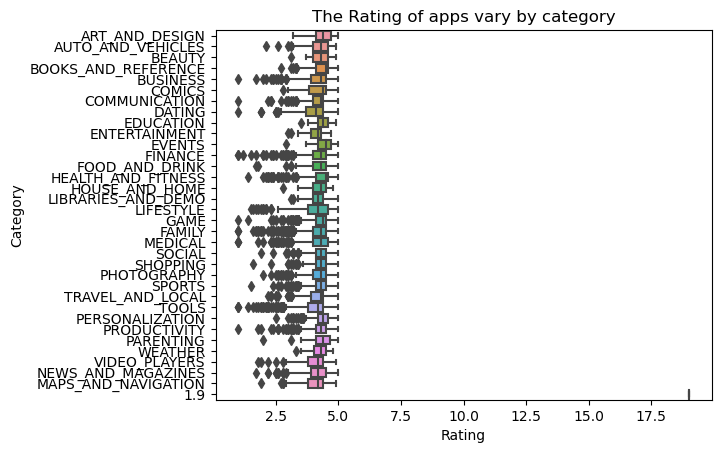

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("The Rating of apps vary by category")
sns.boxplot(data = df,x = df["Rating"],y = df["Category"])
plt.xlabel("Rating")
plt.ylabel("Category")
plt.show()

In [ ]:
""" Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis."""

In [45]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observations:
    
    Yes, there are missing Values in a dataset.
    In Rating ---> 1474 missing Values
    In Type and Content Rating ----> there are 1 and 1 missing values present
    In current Ver ----> 8 missing values
    In Android Ver -----> 3 Missing values

Descripition:

    1. Data Integrity and Completeness:    
        Missing values affect the overall integrity and completeness of the dataset. If critical attributes like Category, Rating, Installs, and Content Rating have missing values, it might significantly impact the usability and reliability of any analysis or predictions based on these attributes.

    2.Analytical Accuracy:
        The presence of missing values can introduce bias or inaccuracies in statistical analysis or machine learning models. Missing values might distort the true relationships and patterns in the data, leading to erroneous conclusions or predictions.

    3.Data Cleaning and Imputation:
        Handling missing values requires data cleaning and imputation techniques. Imputation involves filling in the missing values using various methods such as mean, median, mode imputation, or more sophisticated methods like regression imputation. The choice of imputation method can affect the dataset's characteristics and subsequent analysis.

    4.Model Performance:
        For machine learning models, missing values can pose challenges during model training and evaluation. Some models may not accept missing values and require imputation before training, which can introduce additional complexity.

    5. Reduced Sample Size:
        Missing values reduce the effective sample size available for analysis, potentially reducing the statistical power and representativeness of the dataset.

In [ ]:
""" Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship. """

In [2]:
import numpy as np
df["Size"] = df["Size"].str.replace('M','000')
df["Size"] = df["Size"].str.replace('k','')
df["Size"] = df["Size"].replace('Varies with device',np.nan)
df["Size"] = df['Size'].replace('1,000+','1')

In [3]:
df["Size"] = df["Size"].astype(float)

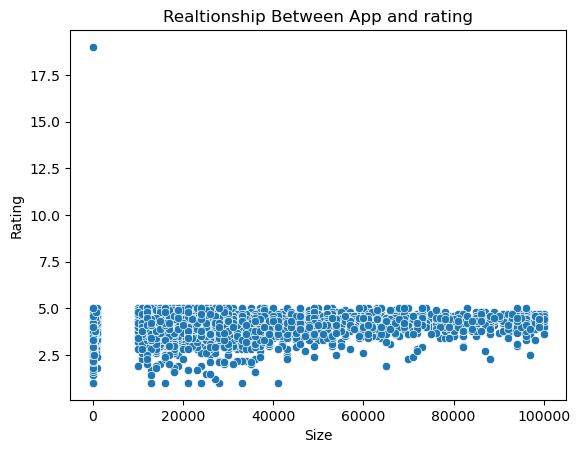

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Realtionship Between App and rating")
plt.xlabel("Size")
plt.ylabel("Rating")
sns.scatterplot(data = df, x = df["Size"] , y = df["Rating"])
plt.show()

In [ ]:
""" Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type. """

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df["Price"] = df["Price"].replace('$','')
df["Price"] = df["Price"].replace('Everyone','0')
df["Price"] = df["Price"].astype(float)

In [18]:
df1 = df.groupby("Type")["Price"].mean()
df1

Type
0        0.000000
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<AxesSubplot: title={'center': 'Comparision of App type With average Prices'}, xlabel='Type'>

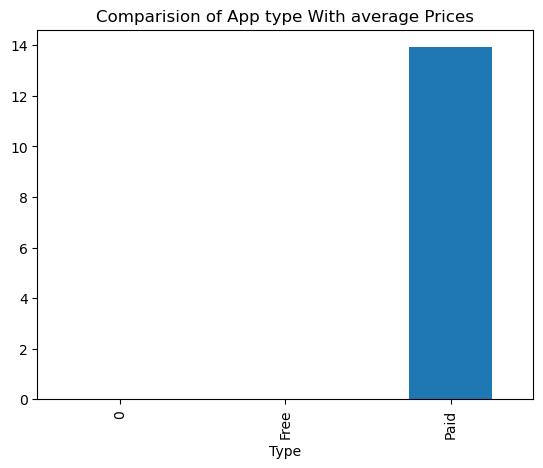

In [19]:
df1.plot(kind = 'bar',title = "Comparision of App type With average Prices")

In [ ]:
""" Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs. """

#Top Most apps in dataset: 

In [46]:
df["Installs"] = df["Installs"].str.replace(',','')
df["Installs"] = df["Installs"].str.replace('Free','1000000')

In [47]:
df["Installs"] = df["Installs"].astype(int)

In [52]:
df.sort_values(by = ["Installs","Rating"],ascending=False).head(10)[["App","Installs","Rating"]]

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
1700,Subway Surfers,1000000000,4.5
1750,Subway Surfers,1000000000,4.5
1872,Subway Surfers,1000000000,4.5
1917,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2604,Instagram,1000000000,4.5
2611,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
2853,Google Photos,1000000000,4.5


In [ ]:
""" Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company? """

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

In [19]:
df.sort_values(["Rating","Installs","Reviews"],ascending=False).head(10)[["App","Category","Rating","Reviews","Installs"]]

,App,Category,Rating,Reviews,Installs
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000000
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,10000
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,5000
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,5000
8058,Oración CX,LIFESTYLE,5.0,103,5000
9496,Master E.K,FAMILY,5.0,90,1000
8327,The Divine Feminine App: the DF App,LIFESTYLE,5.0,8,1000
5064,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,LIFESTYLE,5.0,7,1000
7320,CG - Chemistry free,FAMILY,5.0,7,1000
7478,CK Employee Portal,BUSINESS,5.0,7,1000


In [ ]:
""" Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings? """

In [20]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Ans.
*To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:*

    Number of downloads: This would indicate how popular an app is among users.

    Rating: A higher rating indicates that users are satisfied with the app.

    Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.

    Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.

    Price: The price of the app could provide insights into the developer's pricing strategy.

    App size: The size of the app could impact its popularity and the user experience.

*To present the findings, we could use various data visualizations such as:*

    Bar charts and pie charts to represent the number of downloads and rating of the apps.

    Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.

    Heat maps to analyze the distribution of apps across different categories.

    Line graphs to represent the trend in the number of reviews over time.

    Tables and charts to compare the performance of different app developers.

    Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating

In [36]:
df["Price"].mode()

0    0
Name: Price, dtype: object

In [40]:
df["Price"] = df["Price"].str.replace('$','')
df["Price"] = df["Price"].replace("Everyone",'0')
df["Price"] = df["Price"].astype(float)
df["Price"]

/tmp/ipykernel_105/2411335412.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace('$','')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [42]:
df.sort_values(["Rating","Installs","Reviews","Price"],ascending=False).head(10)[["App","Category","Rating","Reviews","Installs","Price"]]

,App,Category,Rating,Reviews,Installs,Price
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000000,0.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,10000,0.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,5000,0.0
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,5000,0.0
8058,Oración CX,LIFESTYLE,5.0,103,5000,0.0
9496,Master E.K,FAMILY,5.0,90,1000,0.0
8327,The Divine Feminine App: the DF App,LIFESTYLE,5.0,8,1000,0.0
5064,Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka,LIFESTYLE,5.0,7,1000,0.0
7320,CG - Chemistry free,FAMILY,5.0,7,1000,0.0
7478,CK Employee Portal,BUSINESS,5.0,7,1000,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


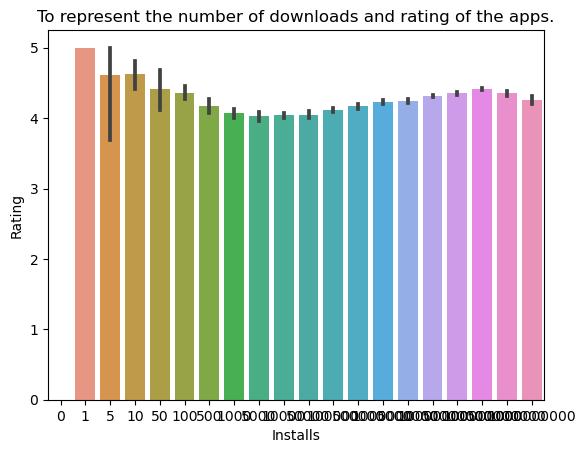

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = df, x = df["Installs"], y = df["Rating"])
plt.title("To represent the number of downloads and rating of the apps.")
plt.show()

In [ ]:
""" Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings? """

To identify the best time to launch a new app, we would need to analyze various features such as:*

    Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

    Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

    Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

    Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

    User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

*To present the findings, we could use various data visualizations such as:*

    Line graphs to represent the trend in the number of downloads, rating, and reviews over time.

    Heat maps to analyze the distribution of app downloads by month and day of the week.

    Bar charts to represent the performance of competing apps in a particular category.

    Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.

    Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.